## Task 3 - Exploratory Data Analysis - Retail

### Submitted by - Shivank Udayawal

### Exploratory Data Analysis on Sample SuperStore

## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## Read the Data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Let's check the summary of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


## Total Unique Value

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Missing Value

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

As we see, there is no missing value in the dataset

## Data Visualizing

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

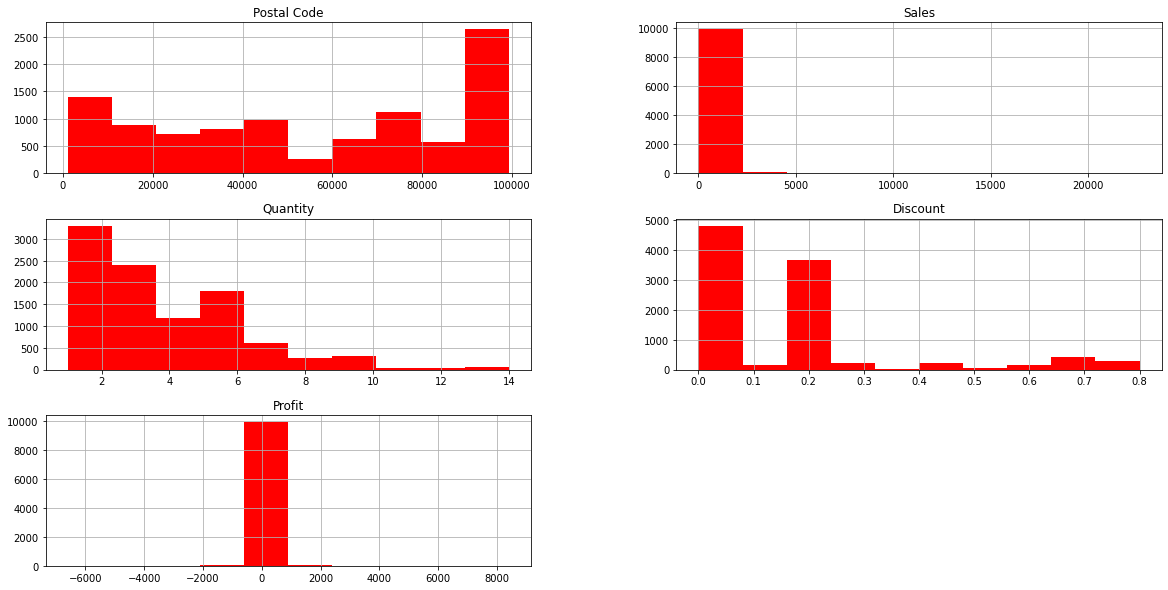

In [9]:
df.hist(figsize=(20,10), color="red")

In [10]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Profit', ylabel='Density'>

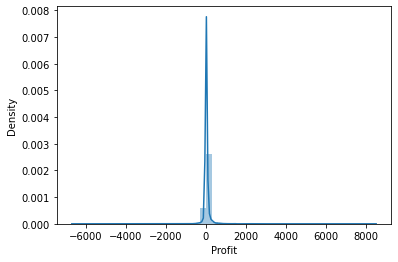

In [11]:
sns.distplot(df['Profit'])

<AxesSubplot:xlabel='Discount', ylabel='Density'>

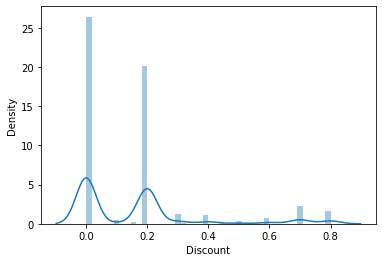

In [12]:
sns.distplot(df['Discount'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

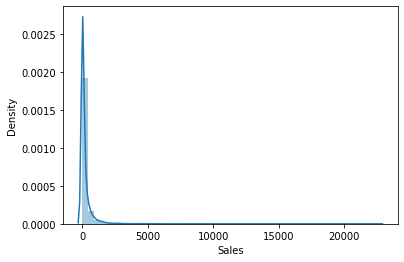

In [13]:
sns.distplot(df['Sales'])

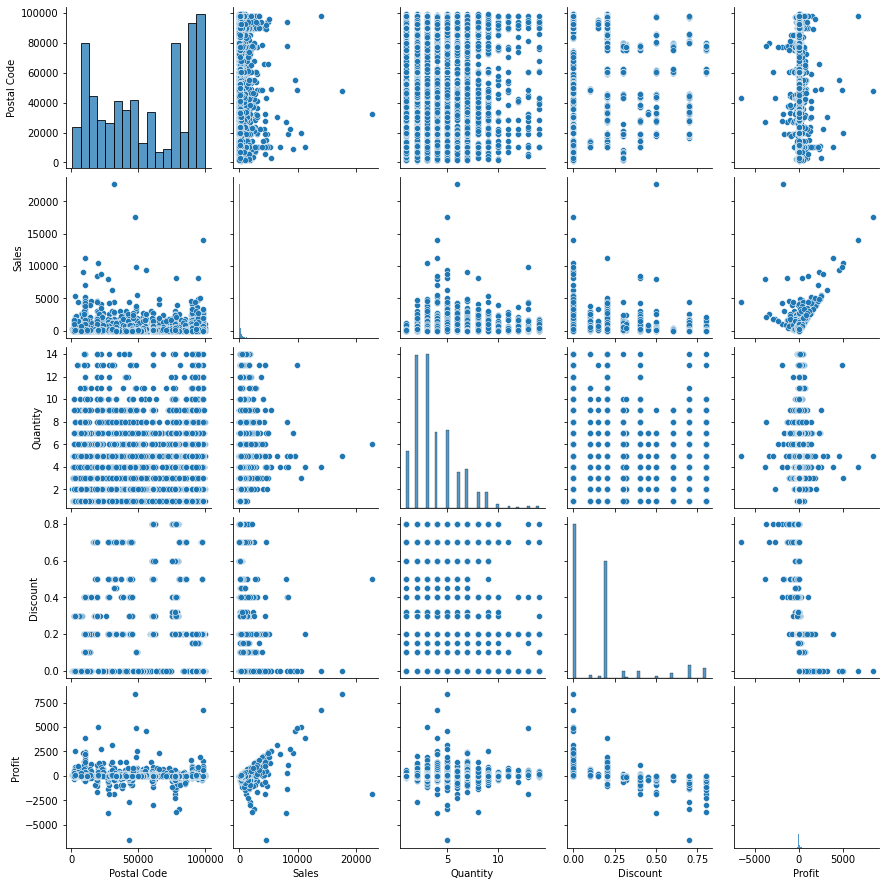

In [14]:
sns.pairplot(df)

<AxesSubplot:>

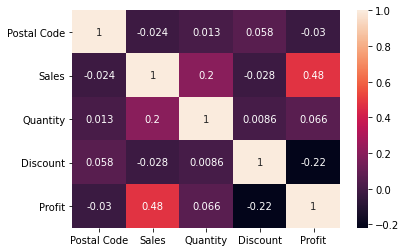

In [15]:
sns.heatmap(df.corr(),annot=True)

 From Above Correlation Matrix (Heatmap) we can say:
 * 1. Profit and Sales are moderately correlated.
 * 2. Profit and Discount are negatively correlated.
 * 3. Quantity and Sales are less correlated.

## Pairplot to analyse each column

### 1. Based on Category 

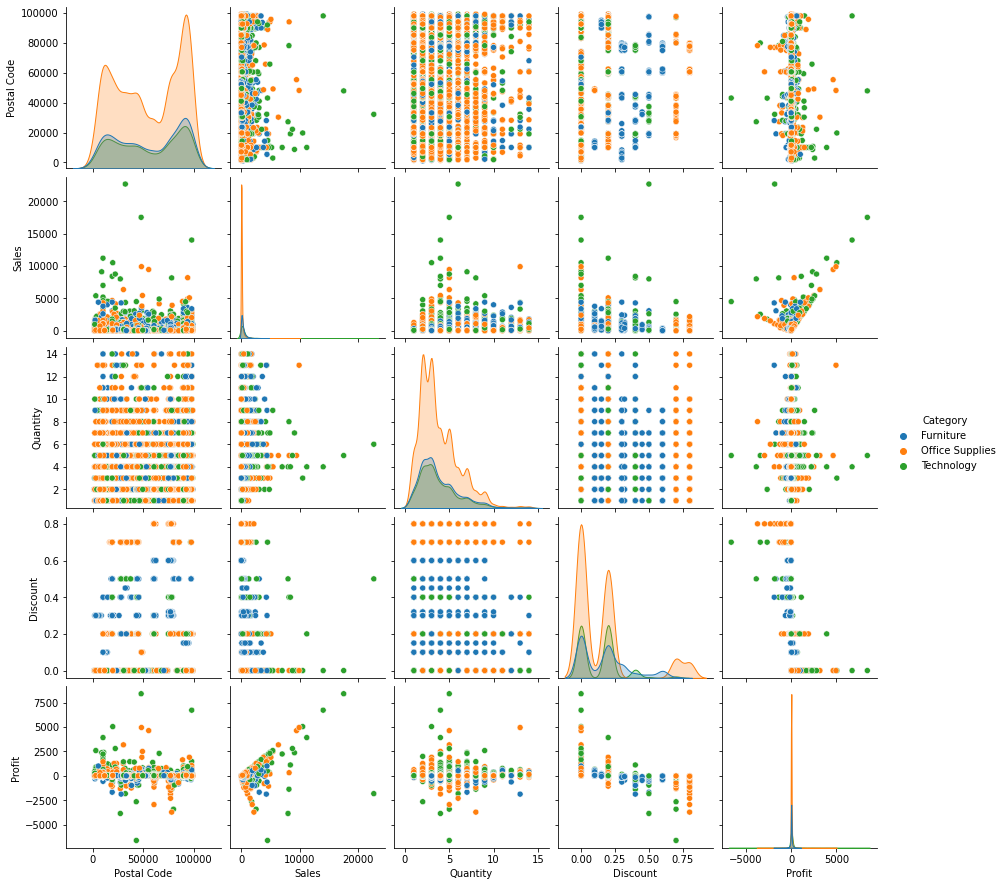

In [16]:
sns.pairplot(df, hue = 'Category')

### 2. Based on Region

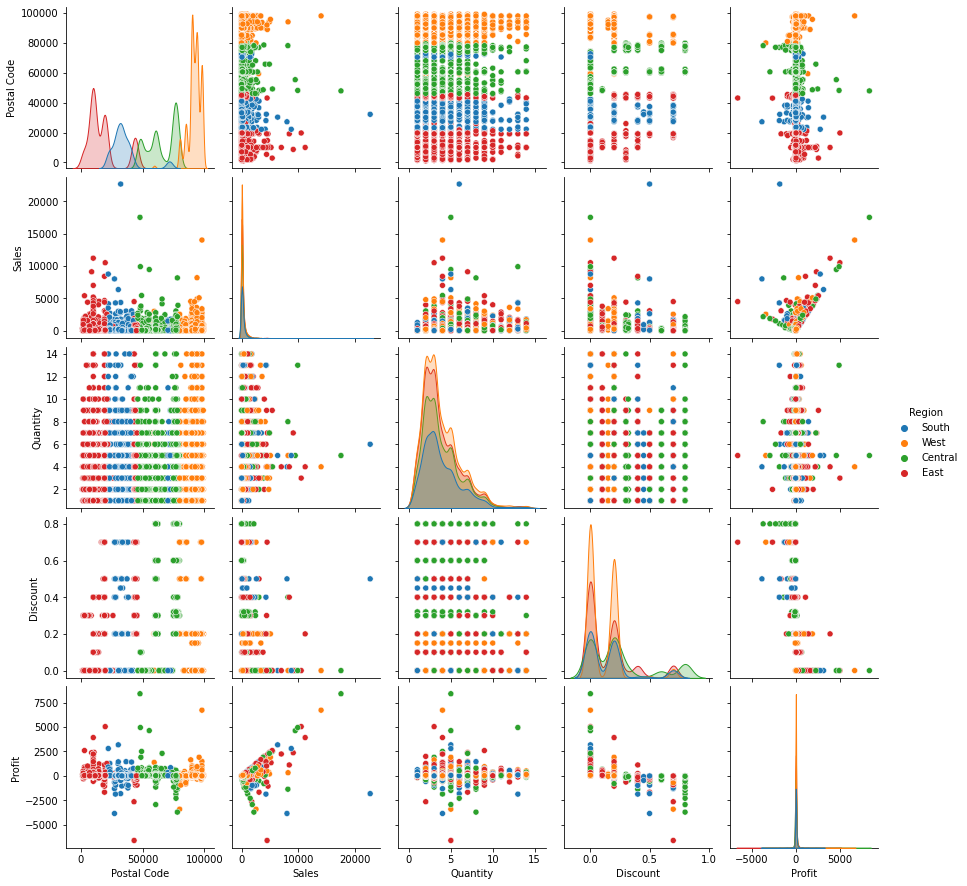

In [17]:
sns.pairplot(df, hue = 'Region')

### 3. Based on Segment

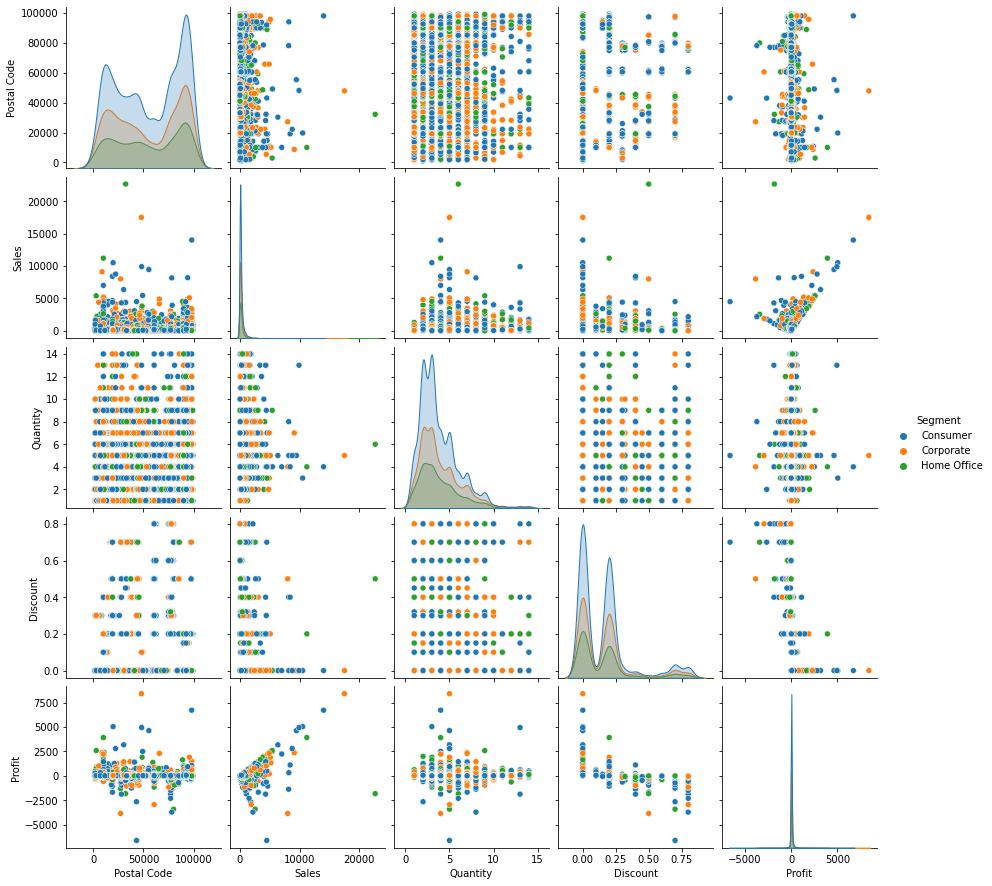

In [18]:
sns.pairplot(df, hue = 'Segment')

## Analyzing Profit based on various aspects

### 1. Based on Ship Mode

In [19]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

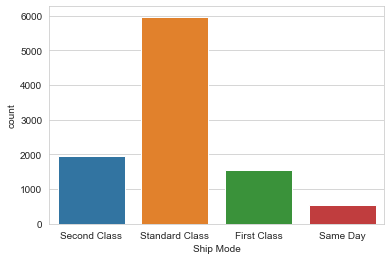

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df)

In [21]:
df_shipmode = df.groupby(['Ship Mode'])['Sales','Discount','Profit'].mean()
df_shipmode

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


In [22]:
df[df['Ship Mode'] == 'First Class'].Profit.sum()

48969.8399

In [23]:
df[df['Ship Mode'] == 'Same Day'].Profit.sum()

15891.7589

In [24]:
df[df['Ship Mode'] == 'Second Class'].Profit.sum()

57446.63540000001

In [25]:
df[df['Ship Mode'] == 'Standard Class'].Profit.sum()

164088.7875

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

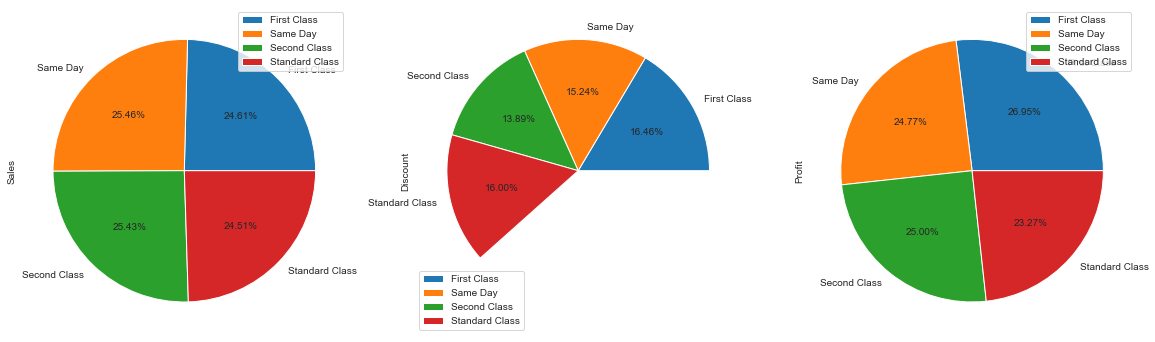

In [26]:
df_shipmode.plot.pie(subplots=True, label=df_shipmode.index, autopct='%1.2f%%', figsize=(20,20))

* Sales are more in "Same Day"
* Discount are more in "First Class"
* Profit are more in "First Class"

## 2. Based on Segment

In [27]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

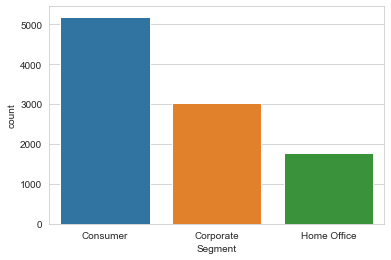

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df)

In [29]:
df_segment = df.groupby(['Segment'])['Sales','Discount','Profit'].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


In [30]:
df[df['Segment'] == 'Consumer'].Profit.sum()

134119.2092

In [31]:
df[df['Segment'] == 'Corporate'].Profit.sum()

91979.13399999999

In [32]:
df[df['Segment'] == 'Home Office'].Profit.sum()

60298.678499999995

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

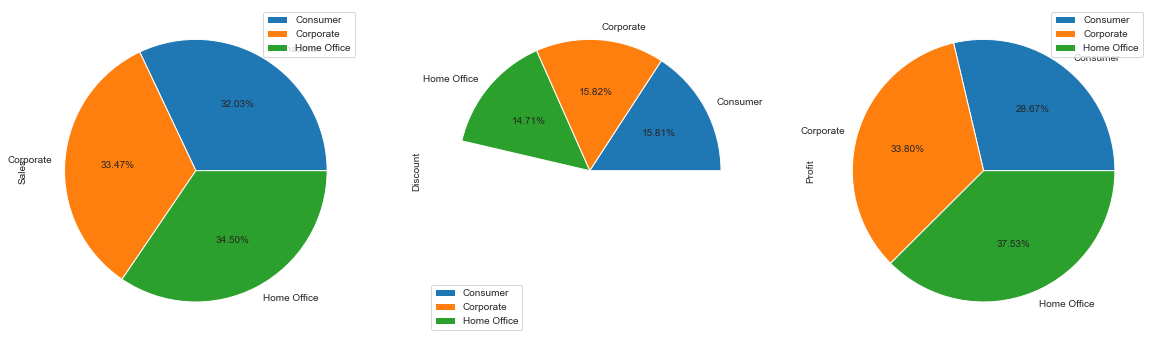

In [33]:
df_segment.plot.pie(subplots=True, label=df_segment.index, autopct='%1.2f%%', figsize=(20,20))

* Sales are more in "Home Office"
* Discount are more in "Corporate"
* Profit are more in "Home Office"

## 3. Based on City

In [34]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Rock Hill          1
Port Orange        1
Whittier           1
Commerce City      1
Goldsboro          1
Name: City, Length: 531, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

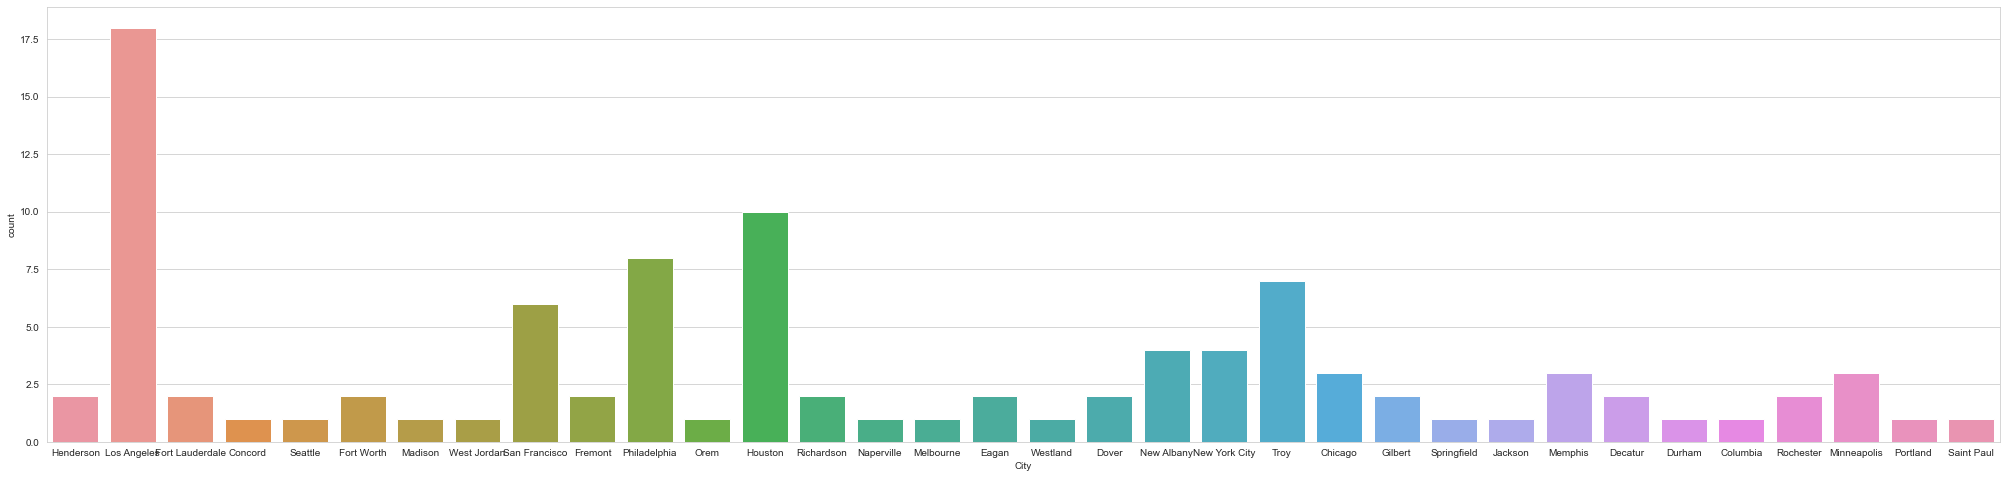

In [35]:
fig, ax = plt.subplots(figsize=(35,8))
sns.countplot(df['City'].head(100))

In [36]:
df_city = df.groupby(['City'])['Sales','Discount','Profit'].mean()
df_city.head(10)

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644
Allen,72.551500,0.375000,-9.969375
Allentown,121.893143,0.271429,-32.350057
Altoona,10.225500,0.450000,-0.591750
Amarillo,377.306280,0.272000,-38.796830


In [37]:
df_city.tail(10)

,Sales,Discount,Profit
City,,,
Wilmington,202.696139,0.080556,54.102831
Wilson,61.455333,0.366667,-2.389333
Woodbury,202.550000,0.000000,65.365400
Woodland,88.220667,0.133333,11.128267
Woodstock,228.780000,0.260000,15.998580
Woonsocket,48.887500,0.000000,19.669775
Yonkers,510.511067,0.066667,184.517047
York,163.595600,0.420000,-20.433840
Yucaipa,50.800000,0.000000,13.208000


####  Sorting the Cities with respect to Profit in descending

In [38]:
df_city = df_city.sort_values('Profit', ascending = False)

df_city.head(10)

,Sales,Discount,Profit
City,,,
Jamestown,2354.395000,0.000000,642.885750
Independence,1208.685000,0.000000,487.831500
Lafayette,807.619355,0.000000,323.173794
Minneapolis,733.501739,0.000000,296.721070
Appleton,835.655000,0.000000,277.383150
Morristown,719.014286,0.000000,262.603871
Burbank,1082.386000,0.066667,254.844600
Lehi,758.363000,0.100000,225.831300
Beverly,861.063333,0.000000,218.306467


In [39]:
df_city.tail(10)

,Sales,Discount,Profit
City,,,
Yuma,210.216250,0.450000,-116.497725
San Antonio,370.229288,0.383051,-123.712715
Burlington,866.723280,0.136000,-144.915088
Medina,275.302444,0.433333,-149.227178
Clarksville,316.818571,0.271429,-150.764743
Lancaster,215.031826,0.315217,-157.371052
Round Rock,693.436114,0.274286,-169.061614
Oswego,107.326000,0.600000,-178.709200
Champaign,151.960000,0.600000,-182.352000


#### Plot Sales, Discount & Profit of Top 30 Cities

Text(0.5, 1.0, 'City wise analysis of Profit')

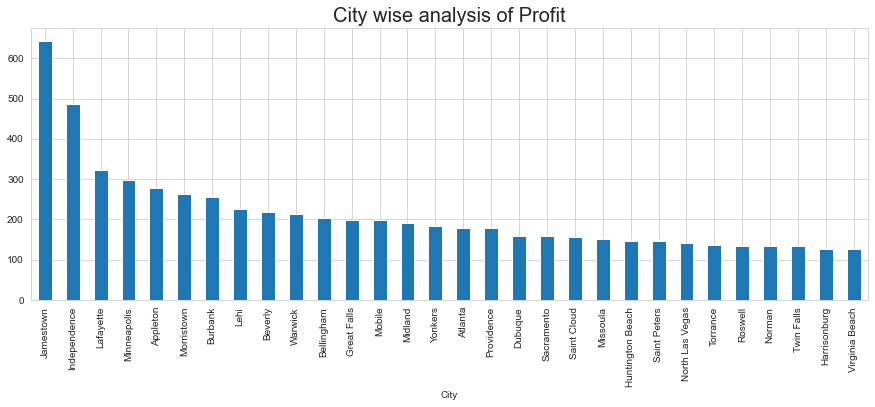

In [40]:
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5))
plt.title("City wise analysis of Profit", size="20")

#### Plot Sales, Discount & Profit of lest 30 Cities

Text(0.5, 1.0, 'City wise analysis of Profit')

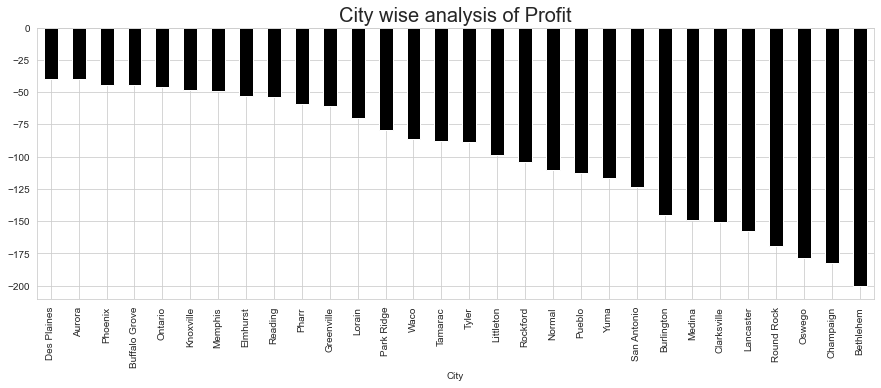

In [41]:
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5), color='black')
plt.title("City wise analysis of Profit", size="20")

* Highest Profit is in "Jamestown"
* Lowest Profit is in "Bethlehem"

### 4. Based on State

In [42]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

In [43]:
df_state = df.groupby(['State'])['Sales','Discount','Profit'].mean()
df_state.head()

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351


In [44]:
df_state.sort_values('Profit', ascending=False, inplace=True)

In [45]:
df_state.head(10)

,Sales,Discount,Profit
State,,,
Vermont,811.760909,0.000000,204.088936
Rhode Island,404.070643,0.021429,130.100523
Indiana,359.431946,0.000000,123.375411
Montana,372.623467,0.066667,122.221900
Minnesota,335.541011,0.000000,121.608847
District of Columbia,286.502000,0.000000,105.958930
Delaware,285.948635,0.006250,103.930988
Wyoming,1603.136000,0.200000,100.196000
Missouri,336.441667,0.000000,97.518341


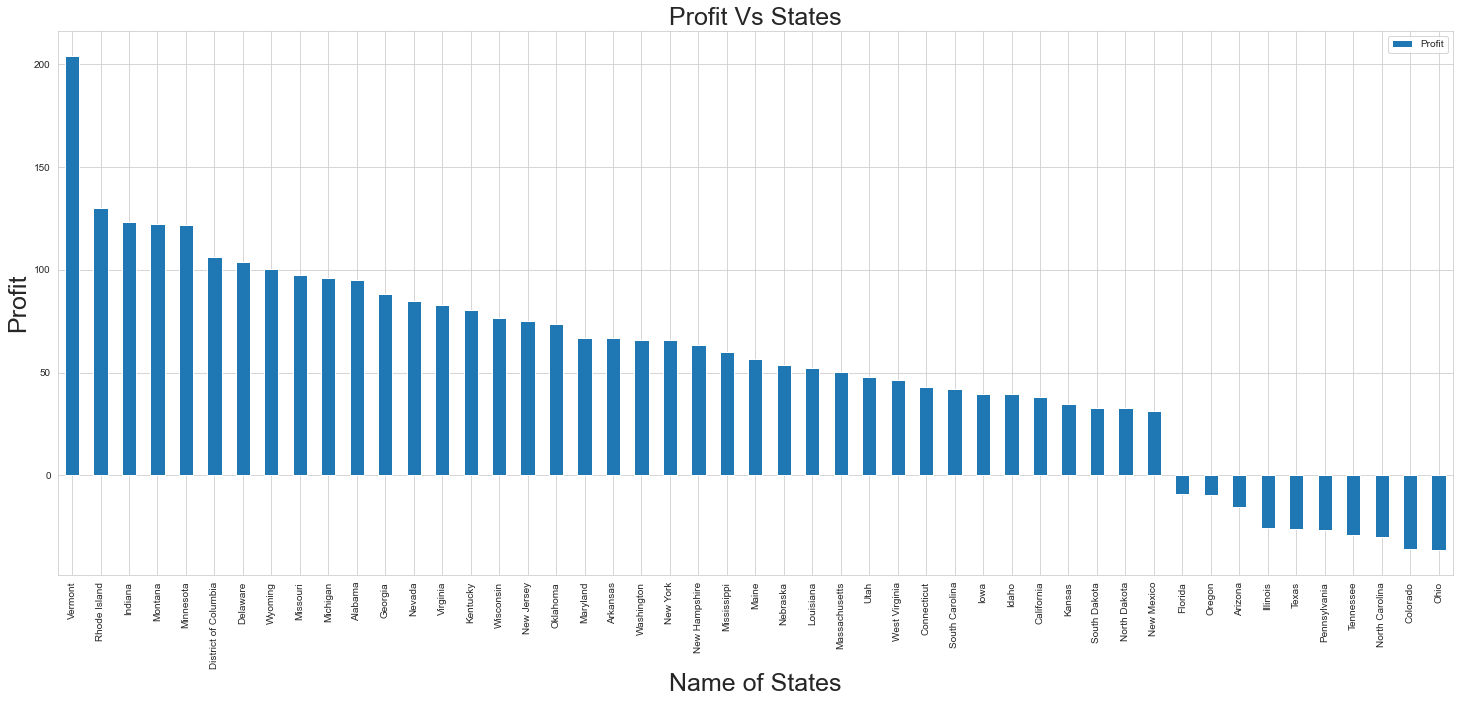

In [46]:
df_state[['Profit']].plot(kind = 'bar', figsize=(25,10))
plt.xlabel("Name of States", size = '25')
plt.ylabel("Profit", size = '25')
plt.title("Profit Vs States", size = '25')
plt.legend()

 * "Vermont" has highest Profit 
 * "Ohio"    has lowest Profit

array([<AxesSubplot:ylabel='Sales'>], dtype=object)

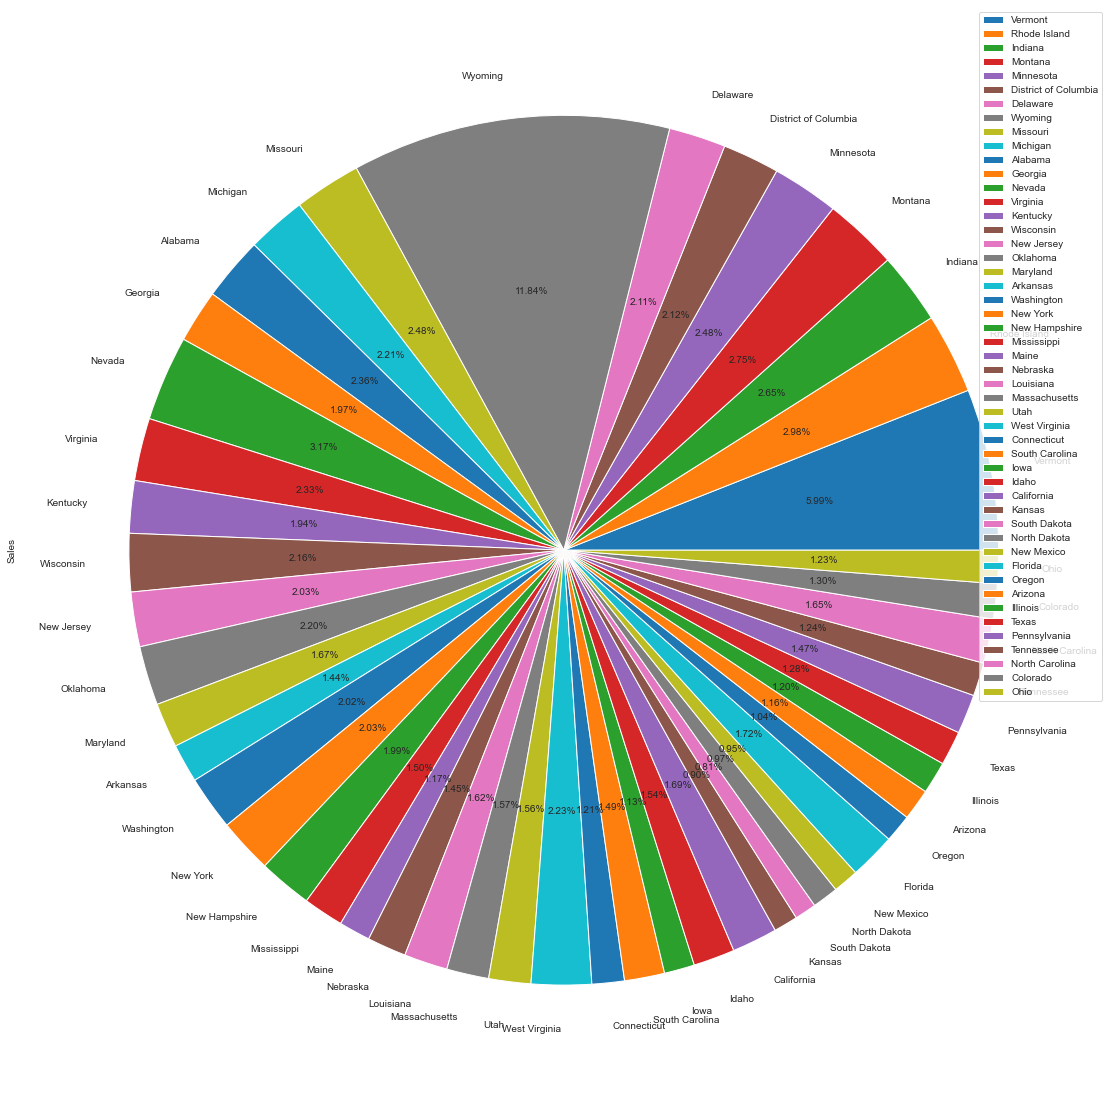

In [47]:
df_state[['Sales']].plot.pie(subplots=True, label=df_state.index, autopct='%1.2f%%', figsize=(60,20))

### Plot of Top 30 States which have Highest Sales

In [48]:
df_state_sale = df_state.sort_values('Sales', ascending = False)

Text(0, 0.5, 'Sales')

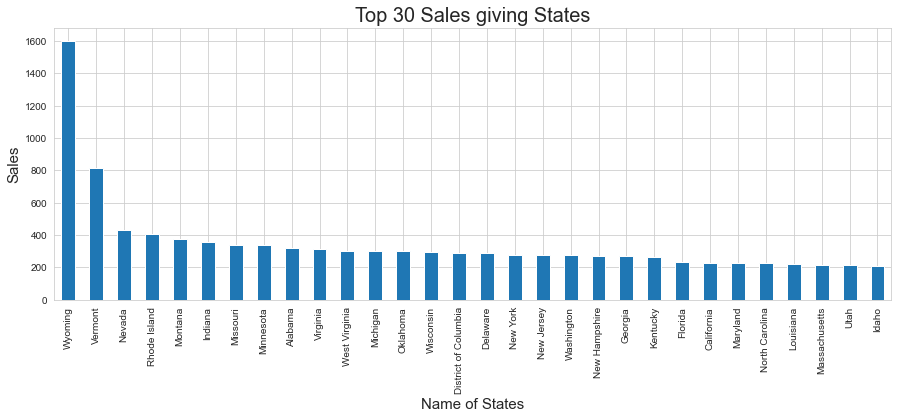

In [49]:
df_state_sale['Sales'].head(30).plot(kind='bar',figsize=(15,5))
plt.title("Top 30 Sales giving States", size="20")
plt.xlabel("Name of States", size = "15")
plt.ylabel("Sales", size = "15")

### Plot of Least 30 States which have Lowest Sales

Text(0, 0.5, 'Sales')

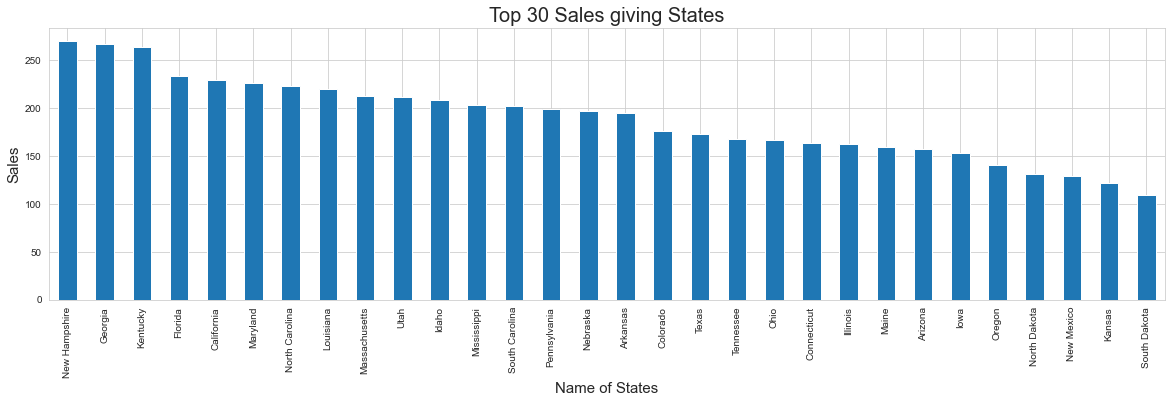

In [50]:
df_state_sale['Sales'].tail(30).plot(kind='bar',figsize=(20,5))
plt.title("Top 30 Sales giving States", size="20")
plt.xlabel("Name of States", size = "15")
plt.ylabel("Sales", size = "15")

* "Wyoming"  has Highest Sales
* "South Dakota"  has Lowest Sales

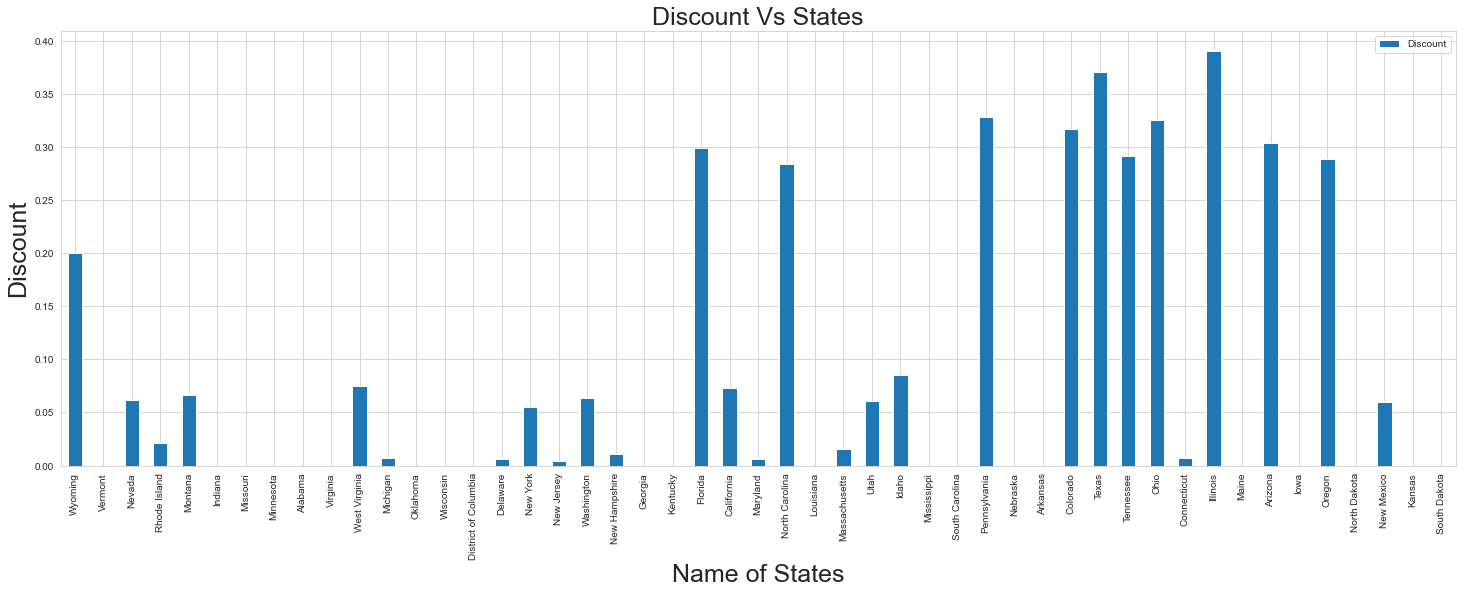

In [51]:
df_state_sale[['Discount']].plot(kind = 'bar', figsize=(25,8))
plt.xlabel("Name of States", size = '25')
plt.ylabel("Discount", size = '25')
plt.title("Discount Vs States", size = '25')
plt.legend()

* "Illionis"  has Highest Discount

## 5. Based on Category

In [52]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [53]:
df_cat = df.groupby(['Category'])['Sales','Discount','Profit'].mean()
df_cat.head()

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

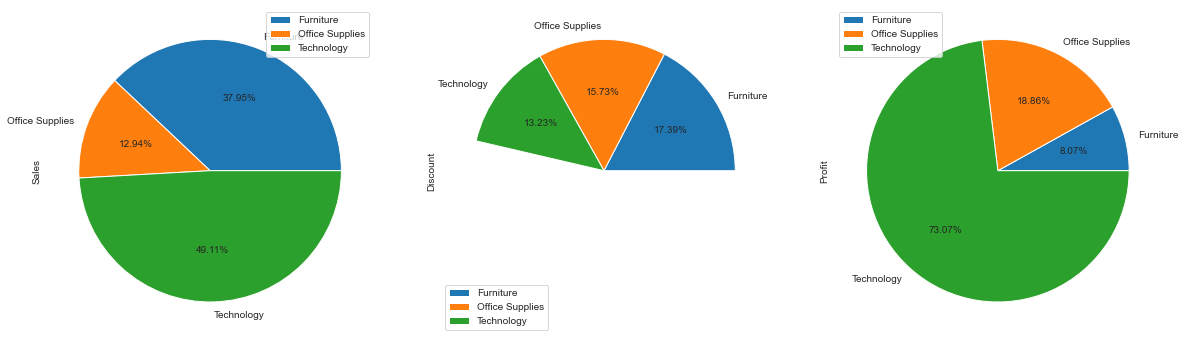

In [54]:
df_cat.plot.pie(subplots=True, label=df_cat.index, autopct='%1.2f%%', figsize=(20,20))

* Highest Sales and Profit is in "Technology"
* Highest Discount is given in "Furniture"

* Though "Furniture" has 37.95% of Sales and 17.39% of Discount but still its Profit is too less.

## 6. Based on Sub-Category

In [55]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [56]:
df_subcat = df.groupby(['Sub-Category'])['Sales','Discount','Profit'].mean()
df_subcat.head()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>],
      dtype=object)

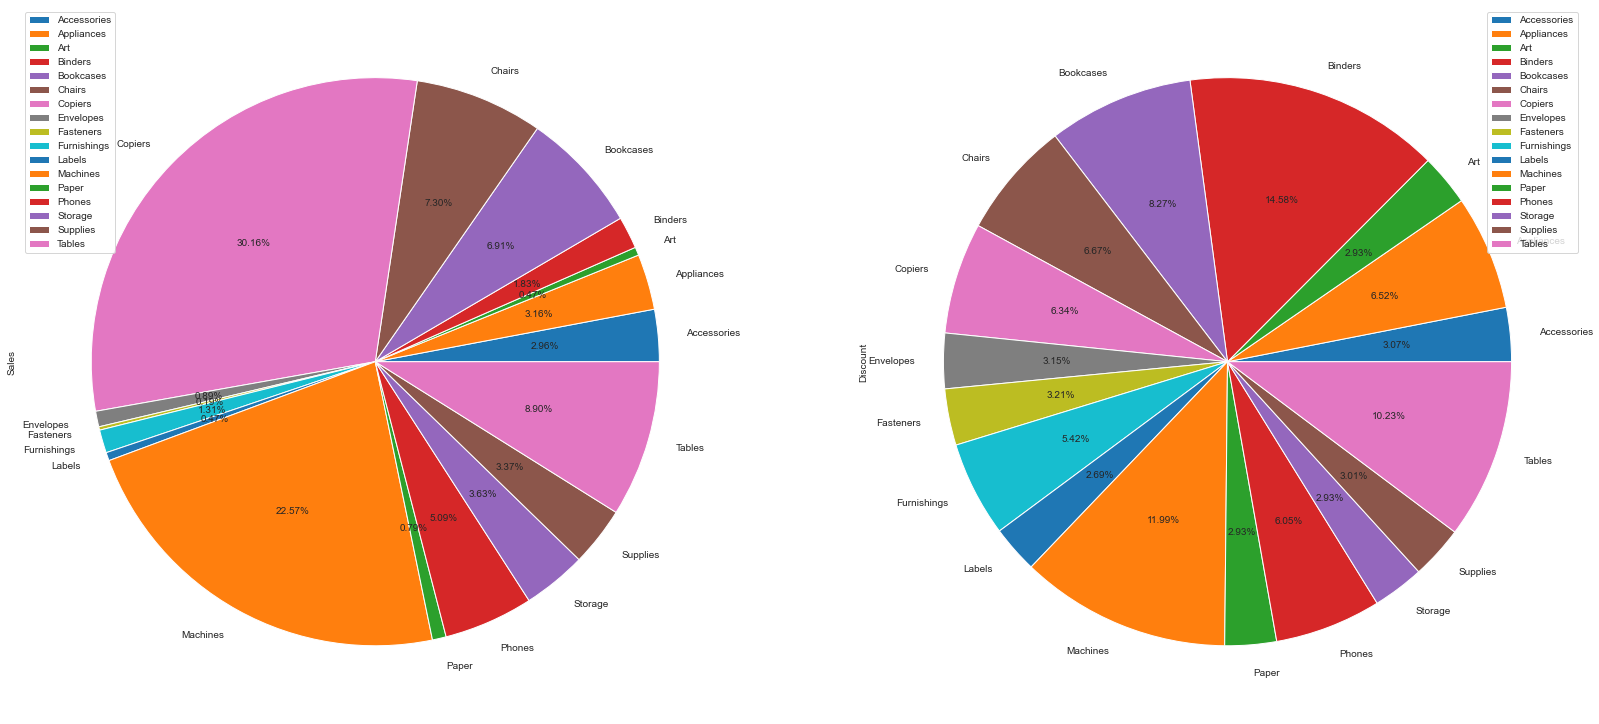

In [57]:
df_subcat[['Sales','Discount']].plot.pie(subplots=True, label=df_subcat.index, autopct='%1.2f%%', figsize=(28,20))

* Maximum Sales is in "copiers"                                        
* Minimum Sales is in "Art"                                            


* Maximum Discount is in "Binders"
* Minimum Discount is in "Envelopes"

<AxesSubplot:xlabel='Sub-Category'>

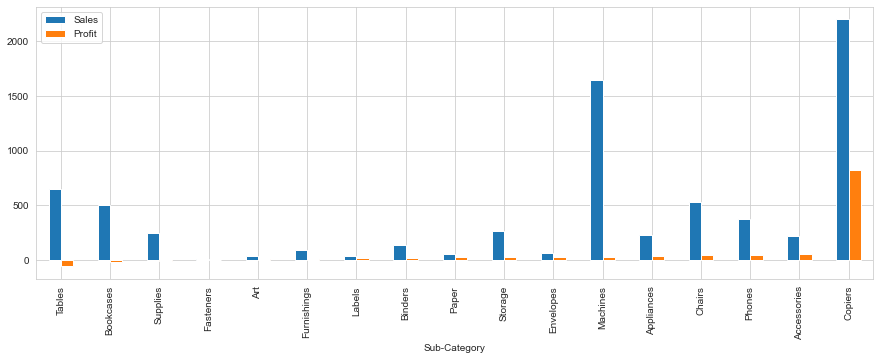

In [58]:
df_subcat.sort_values('Profit')[['Sales','Profit']].plot(kind='bar', label=['Average Sales Prices','Profit'], figsize = (15,5))

#### We should about discount on Tables, though having good sales of Table, Profit is negative i.e not at all.

#### Also huge discount on Machines, so very less Profit after large sales.

## 7. Based on Region

In [59]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [60]:
df_Region = df.groupby(['Region'])['Sales','Discount','Profit'].mean()
df_Region.head()

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

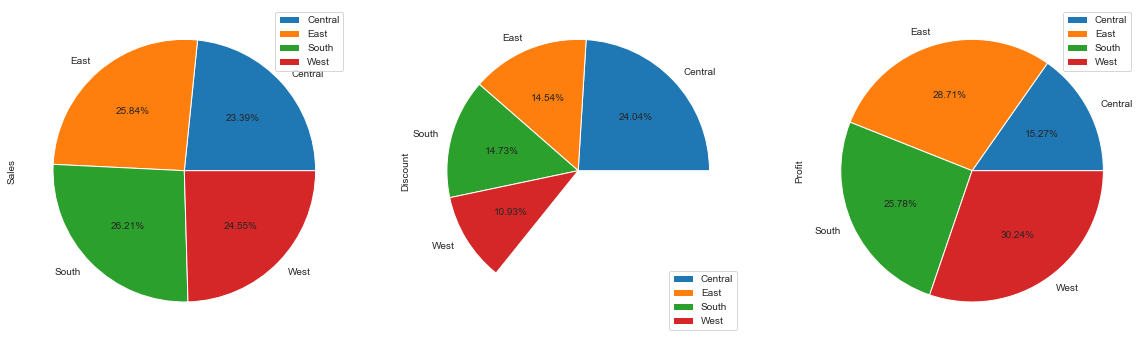

In [61]:
df_Region.plot.pie(subplots=True, label=df_Region.index, autopct='%1.2f%%', figsize=(20,20))

* "Sales" is nearly same in all Regions
* "Discount" is more in Central
* "Profit" is more in West

## Summary 

Profit is more than Sales.

Furniture has less profit mainly because of huge discount on Tables.

So need to think about discount on Tables.

Quantity doesn't affect the profit , that means Profit per item is not consistent.

* State Ohio    : Lowest Profit
* State Vermont : Highest Profit
    
Out of Total Profit 73% is from Technology.

#### 'Sales' and 'Profit'      are  Moderately Correlated.

#### 'Quantity' and 'Profit' are  less Moderately Correlated.

#### 'Discount' and 'Profit' are Negatively Correlated.

* Lowest amount of Sales :  South Dakota (0.8%)